In [1]:
from pathlib import Path

import numpy as np
import torch
import torchvision.transforms.functional as F
from matplotlib import pyplot as plt
from torchvision.utils import draw_segmentation_masks, make_grid

In [2]:
from inz.data.event import Tier1, Tier3, Test, Hold, Subset, Event
from inz.data.data_module import Event, Hold, Test, Tier1, Tier3, XBDDataModule

In [3]:
plt.rcParams["savefig.bbox"] = "tight"


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [4]:
dm = XBDDataModule(
    path=Path("data/xBD_processed"),
    events={
        Tier1: [
            Event.hurricane_harvey,
            Event.santa_rosa_wildfire,
            Event.palu_tsunami,
        ],
        Tier3: list(Tier3.events),
        Hold: list(Hold.events),
        Test: list(Test.events),
    },
    val_faction=0.1,
    test_fraction=0.1,
    train_batch_size=16,
)

In [9]:
dm.prepare_data()
dm.setup("fit")
loader_iter = iter(dm.train_dataloader())

[35572, 35572, 35572, 35572]


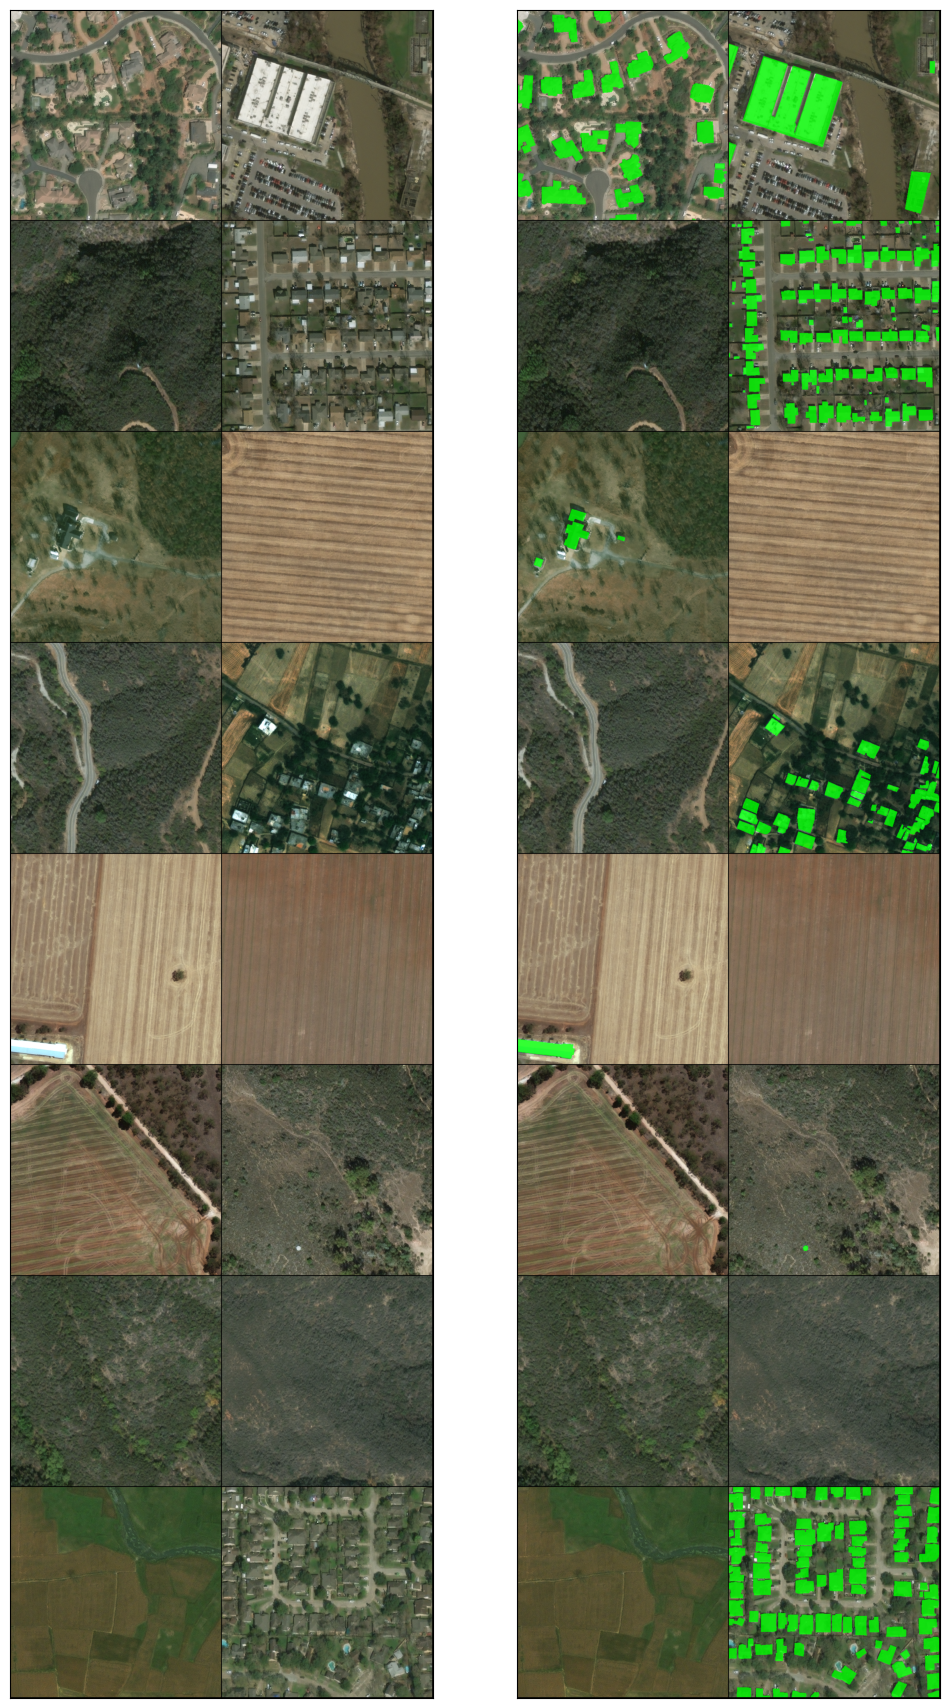

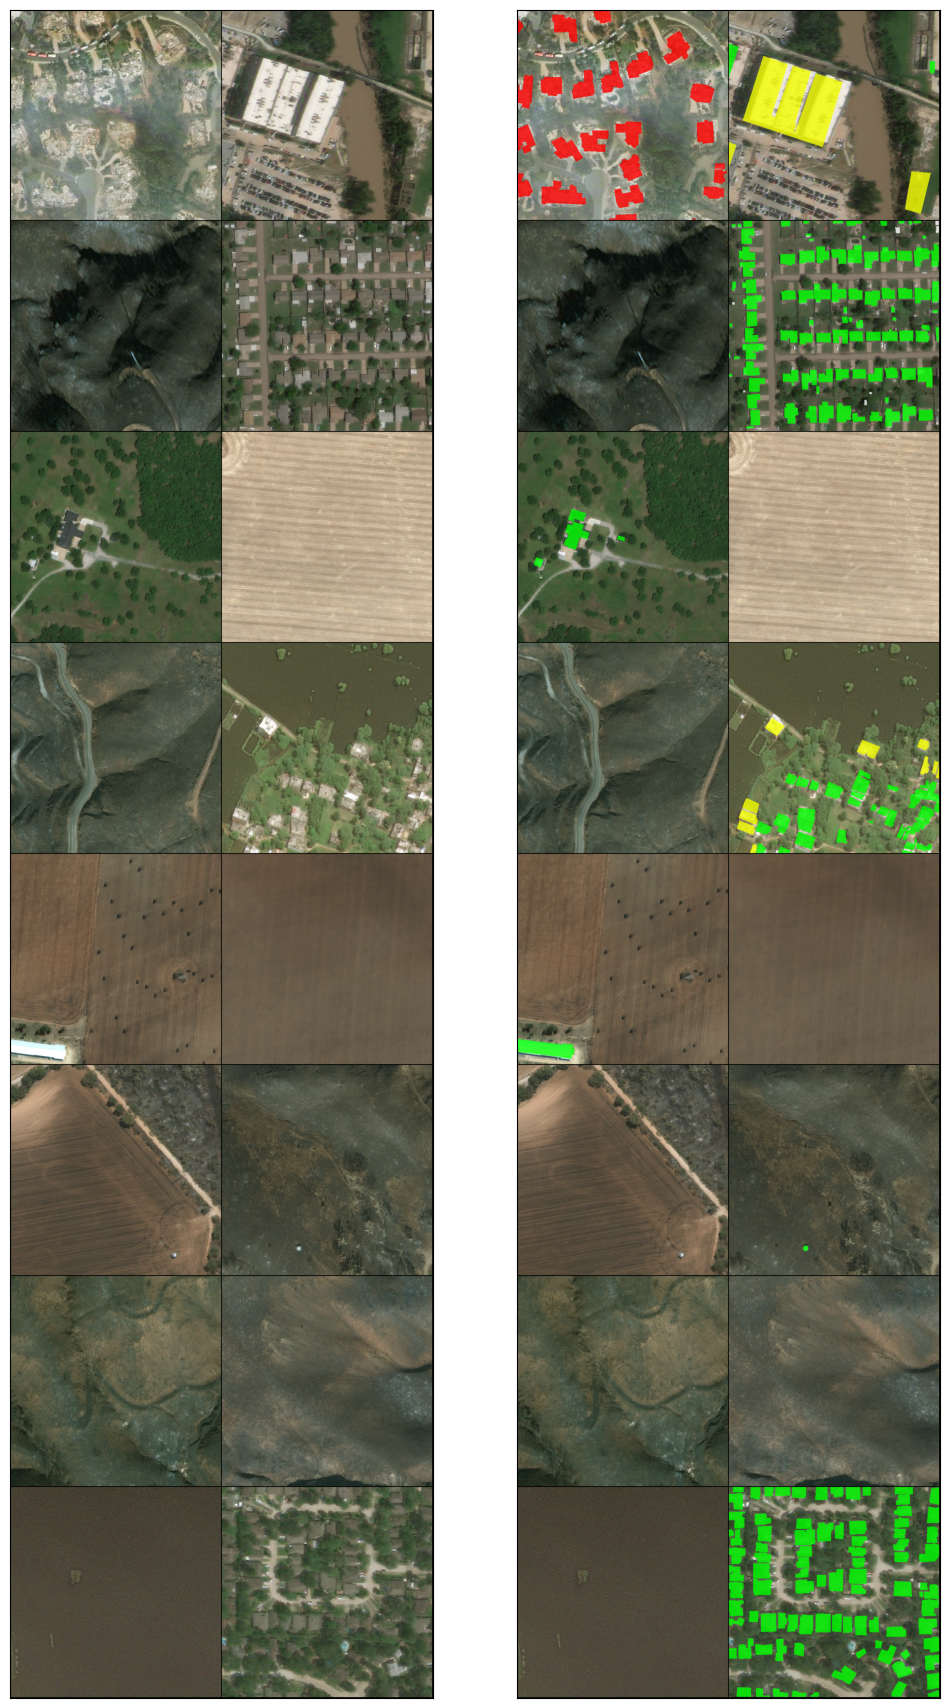

In [11]:
plt.rcParams["figure.figsize"] = [12, 24]
images_pre, masks_pre, images_post, masks_post = next(iter(loader_iter))
colors = [
    (0, 255, 0),
    (244, 255, 0),
    (255, 174, 0),
    (255, 0, 0),
    (255, 255, 255),
]
for images, masks in ((images_pre, masks_pre), (images_post, masks_post)):
    show(
        [
            make_grid(images, nrow=2),
            make_grid(
                [draw_segmentation_masks(i, m, colors=colors) for i, m in zip(images, masks.to(torch.bool))], nrow=2
            ),
        ]
    )